In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Load 42 Parliament data
df = pd.read_csv('data/parliament_speeches/42Parl.csv', low_memory=False)

df.head()

,Unnamed: 0,basepk,hid,speechdate,pid,opid,speakeroldname,speakerposition,maintopic,subtopic,subsubtopic,speechtext,speakerparty,speakerriding,speakername,speakerurl
0,0,4647938,ca.proc.d.2015-12-10.17039.1,2015-12-10,ed1028ae-42dc-4294-9b39-4c5daff5fc74,286.0,"Mr. David Tilson (Dufferin—Caledon, CPC)",NaN,Routine Proceedings,ALS Month Act,NaN,"moved for leave to introduce Bill C-205, An A...",Conservative,Dufferin--Caledon,David Tilson,http://www.parl.gc.ca/parlinfo/Files/Parliamen...
1,1,4647940,ca.proc.d.2015-12-10.17039.3,2015-12-10,ed1028ae-42dc-4294-9b39-4c5daff5fc74,286.0,"Mr. David Tilson (Dufferin—Caledon, CPC)",NaN,Routine Proceedings,ALS Month Act,NaN,"(Motions deemed adopted, bill read the first ...",Conservative,Dufferin--Caledon,David Tilson,http://www.parl.gc.ca/parlinfo/Files/Parliamen...
2,2,4647942,ca.proc.d.2015-12-10.17039.5,2015-12-10,e849cb7a-82f0-49eb-aea4-573c06169a5d,9294.0,"Mr. Jim Eglinski (Yellowhead, CPC)",NaN,Routine Proceedings,Criminal Code,NaN,"moved for leave to introduce Bill C-206, An A...",Conservative,Yellowhead,Jim Eglinski,NaN
3,3,4647943,ca.proc.d.2015-12-10.17039.6,2015-12-10,24b3616f-1e8d-4fd3-9420-0a3d7ab8b6d3,9547.0,"Mr. Todd Doherty (Cariboo—Prince George, CPC)",NaN,Routine Proceedings,National Appreciation Day Act,NaN,"moved for leave to introduce Bill C-207, An A...",Conservative,Cariboo--Prince George,Todd Doherty,NaN
4,4,4647944,ca.proc.d.2015-12-10.17039.7,2015-12-10,24b3616f-1e8d-4fd3-9420-0a3d7ab8b6d3,9547.0,"Mr. Todd Doherty (Cariboo—Prince George, CPC)",NaN,Routine Proceedings,Canada Evidence Act,NaN,"moved for leave to introduce Bill C-208, An A...",Conservative,Cariboo--Prince George,Todd Doherty,NaN


# Speech Length by Word Count

min            0.000000
max        12268.000000
median       108.000000
mean         231.535945
std          404.179055
size      100098.000000
Name: speechtext, dtype: float64

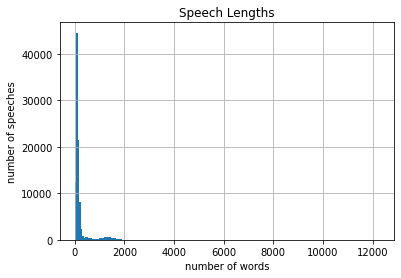

In [3]:
speechLengths = df.speechtext.str.count('\s+')

plt.title('Speech Lengths')
plt.ylabel('number of speeches')
plt.xlabel('number of words')
speechLengths.hist(bins = 200)
speechLengths.agg(['min','max','median','mean','std','size'])

<AxesSubplot:title={'center':'Speech Length Frequency'}, xlabel='number of words (log scale)', ylabel='number of speeches'>

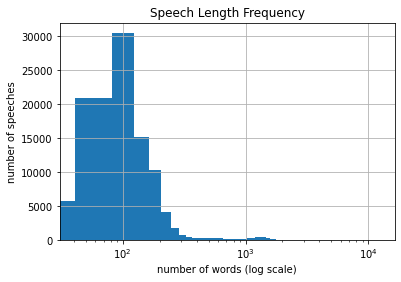

In [4]:
plt.title('Speech Length Frequency')
plt.ylabel('number of speeches')
plt.xlabel('number of words (log scale)')
plt.xscale('log')
speechLengths.hist(bins = 300)

91554


<AxesSubplot:title={'center':'Speech Length Frequency (excluding speeches greater than 600 words)'}, xlabel='number of words per speech', ylabel='number of speeches'>

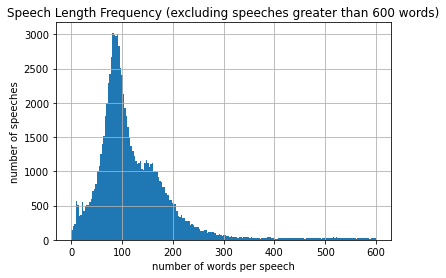

In [5]:
# plot speeches that are shorter than 600 words
regularSpeechLengths = speechLengths[(speechLengths<600)]  # & (speechLengths<600)
print(len(regularSpeechLengths))
plt.title('Speech Length Frequency (excluding speeches greater than 600 words)')
plt.ylabel('number of speeches')
plt.xlabel('number of words per speech')
regularSpeechLengths.hist(bins = 200)

## Long Speeches
insert analysis here later -- this is not as crucial as the lower threshold

In [6]:
# where are the speeches really long?
speechLengths.index[speechLengths>4000].tolist()

[17247,
 54444,
 54452,
 55708,
 56666,
 56854,
 56866,
 61519,
 69614,
 69746,
 69747,
 86052,
 90520,
 90526,
 91859,
 92136,
 92229,
 94862,
 94911,
 97012,
 97787]

## Short Speeches
Procedure:
1. Look at a random sample of speeches of a narrow range of lengths (take n=30 when sample permits)
2. Classify the content of each speech as 1) procedural, 2) intoducing petition, 3) interjection, 4) ideological, or 5) other
3. The ranges should narrow as I move towards 20-30 word speeches

In [7]:
# make a dictionary of the values so that I can work with the data
speechType = {'procedure': [], 'petition': [], 'interjection': [], 'ideological':[], 'average length': [], 'frequency': []}

# function to examine speeches of a given length
def examine_speeches(speechLengths, lte=0, gt=0, ind=None):
    # get list of indices where speeches are within parameters
    short = speechLengths.index[(speechLengths<=lte) & (speechLengths>gt)].tolist()

    # optionally, can pass existing index list
    if ind is None:
        ind = random.sample(range(0,len(short)),30)
    
    print(f'using indices: {ind}')
    
    for i in ind:
        print(df.loc[short[i],'speechtext'])
        print('-----')
    
    print(f'average length of speeches between {gt} and {lte} words: {speechLengths[short].mean()}')
    print(f'number of speeches between {gt} and {lte} words: {len(short)}')

In [8]:
# where are the speeches of zero length?
# handle separately to look at all of the speeches
short = speechLengths.index[(speechLengths==0)].tolist()
print(short)
for speechind in short:
    print(df.loc[speechind,'speechtext'])
    print('-----')

[3841, 8771, 11909, 15288, 31993, 31998, 35647, 36477, 38878, 52382, 54134, 56574, 62393, 74830, 74998, 84147, 85019]
Pricing.
-----
Debate.
-----
What?
-----
Stolen.
-----
Exactly.
-----
Absolutely.
-----
Time.
-----
Eventually.
-----
Absolutely.
-----
Resign.
-----
No.
-----
Contrary.
-----
Shameful.
-----
Dilbit.
-----
Wow.
-----
Magic.
-----
No.
-----


Classification:
1. procedure = 0
2. petition = 0
3. interjection = 17
4. ideological = 0
5. other = 0

In [9]:
speechType['procedure'] += [0]
speechType['petition'] += [0]
speechType['interjection'] += [1]
speechType['ideological'] += [0]
speechType['average length'] += [0.0]
speechType['frequency'] += [17]

In [10]:
# where are the speeches less than ten words?
randomIndices = [831, 834, 663, 609, 605, 268, 301, 783, 829, 239, 722, 42, 602, 748, 617, 320, 471, 670, 179, 505, 84, 611, 744, 491, 250, 407, 340, 413, 579, 459]
examine_speeches(speechLengths, lte=10, gt=0, ind=randomIndices)

using indices: [831, 834, 663, 609, 605, 268, 301, 783, 829, 239, 722, 42, 602, 748, 617, 320, 471, 670, 179, 505, 84, 611, 744, 491, 250, 407, 340, 413, 579, 459]
 Tell the truth!
-----
 Like you did.
-----
 It makes you want to cry.
-----
Mr. Speaker, I ask that all questions be allowed to stand.
-----
 Unbelievable.
-----
No, Mr. Speaker.
-----
 Winnipeg North.
-----
 Oh, oh!
-----
Mr. Speaker, I consent.
-----
Mr. Speaker, I ask that all questions be allowed to stand.
-----
 With help from the EI fund.
-----
Sure, sure, you are.
-----
Mr. Speaker, no.
-----
 moved that the bill, as amended, be concurred in.
-----
You're not doing it, though.
-----
The hon. member for Sherwood Park—Fort Saskatchewan.
-----
They're still fighting with your government. They haven't—
-----
Mr. Speaker, we agree to apply, with Conservatives voting yes.
-----
Mr. Speaker, I ask that all questions be allowed to stand.
-----
 Oh, oh!
-----
Mr. Speaker, I ask that all questions be allowed stand.
-----
This 

`randomIndices = [831, 834, 663, 609, 605, 268, 301, 783, 829, 239, 722, 42, 602, 748, 617, 320, 471, 670, 179, 505, 84, 611, 744, 491, 250, 407, 340, 413, 579, 459]`

Classification:
1. procedure = 9
2. petition = 0
3. interjection = 18
4. ideological = 3
5. other = 0

In [11]:
speechType['procedure'] += [9/30]
speechType['petition'] += [0]
speechType['interjection'] += [18/30]
speechType['ideological'] += [3/30]
speechType['average length'] += [6.499429874572406]
speechType['frequency'] += [877]

In [12]:
# where are the speeches between ten and twenty words?
randomIndices = [216, 838, 1077, 1359, 1281, 1318, 91, 355, 404, 47, 173, 115, 1185, 219, 1118, 199, 299, 666, 782, 405, 347, 237, 65, 41, 657, 1384, 687, 150, 616, 264]
examine_speeches(speechLengths, lte=20, gt=10, ind=randomIndices)

using indices: [216, 838, 1077, 1359, 1281, 1318, 91, 355, 404, 47, 173, 115, 1185, 219, 1118, 199, 299, 666, 782, 405, 347, 237, 65, 41, 657, 1384, 687, 150, 616, 264]
Madam Speaker, I would ask that all questions be allowed to stand at this time.
-----
Madam Speaker, could the hon. member explain to this House how Bill C-77 would improve victims rights in general?
-----
Mr. Chair, if Premier Horgan blocks or delays the pipeline, leading to new costs, who will absorb those costs?
-----
Mr. Chair, were any code words used to bypass ATIPs regarding the purchase of Australian F-18s?
-----
Mr. Speaker, I would like the unanimous consent of the House to allow my vote to let her speak.
-----
 I would even include Ford and Toyota with Detroit too. That is another six billion right there.
-----
Mr. Speaker, I present on behalf of a number of my constituents a petition on electoral reform.
-----
Mr. Speaker, the Green Party agrees to apply the vote and votes yes.
-----
Mr. Speaker, I wish to p

`randomIndices = [216, 838, 1077, 1359, 1281, 1318, 91, 355, 404, 47, 173, 115, 1185, 219, 1118, 199, 299, 666, 782, 405, 347, 237, 65, 41, 657, 1384, 687, 150, 616, 264]`

Classification:
1. procedure = 14
2. petition = 2
3. interjection = 3
4. ideological = 11
5. other = 0

In [13]:
speechType['procedure'] += [14/30]
speechType['petition'] += [2/30]
speechType['interjection'] += [3/30]
speechType['ideological'] += [11/30]
speechType['average length'] += [14.813342318059298]
speechType['frequency'] += [1484]

In [14]:
# where are the speeches between twenty and twenty-five words?
randomIndices = [613, 310, 753, 333, 487, 380, 628, 505, 503, 21, 152, 221, 767, 618, 443, 668, 27, 441, 743, 491, 378, 462, 304, 650, 519, 722, 128, 177, 486, 611]
examine_speeches(speechLengths, lte=25, gt=20, ind=randomIndices)

using indices: [613, 310, 753, 333, 487, 380, 628, 505, 503, 21, 152, 221, 767, 618, 443, 668, 27, 441, 743, 491, 378, 462, 304, 650, 519, 722, 128, 177, 486, 611]
Mr. Speaker, it was members of the opposition who made that accusation in the House of Commons time and time again, and they were wrong.
-----
Madam Speaker, I do know they accepted one from another party, and it is my understanding that they rejected every single one from my party. 
-----
Madam Chair, did the government originally propose to buy 18 new F-18s because it knew this would give Boeing an advantage in a future bidding process?
-----
Mr. Speaker, after 10 years of neglect by the previous government, we are finally making progress to ensure that women and girls thrive in—
-----
Mr. Speaker, the Ethics Commissioner released the Trudeau report a week after the House rose in December, finding that he broke the—
-----
Madam Speaker, can my colleague tell me how many billions of dollars out of the $80 billion provided f

`randomIndices = [613, 310, 753, 333, 487, 380, 628, 505, 503, 21, 152, 221, 767, 618, 443, 668, 27, 441, 743, 491, 378, 462, 304, 650, 519, 722, 128, 177, 486, 611]`

Classification:
1. procedure = 12
2. petition = 0
3. interjection = 4
4. ideological = 14
5. other = 0

In [15]:
speechType['procedure'] += [12/30]
speechType['petition'] += [0]
speechType['interjection'] += [4/30]
speechType['ideological'] += [14/30]
speechType['average length'] += [22.906587]
speechType['frequency'] += [835]

In [16]:
# where are the speeches between ten and twelve words?
randomIndices = [405, 440, 393, 421, 397, 301, 400, 6, 23, 203, 86, 76, 373, 350, 342, 231, 234, 293, 121, 9, 205, 367, 319, 428, 56, 139, 343, 270, 294, 176]
examine_speeches(speechLengths, lte=12, gt=10, ind=randomIndices)

using indices: [405, 440, 393, 421, 397, 301, 400, 6, 23, 203, 86, 76, 373, 350, 342, 231, 234, 293, 121, 9, 205, 367, 319, 428, 56, 139, 343, 270, 294, 176]
Mr. Chair, the appointments are approved by the chief of defence staff.
-----
Mr. Speaker, the Green Party agrees to apply and will be voting yes.
-----
Mr. Speaker, does the Minister of National Revenue agree that purposely hiding important—
-----
 moved:
 That Bill C-93 be amended by deleting Clause 6. 

-----
Finally, Mr. Speaker, I ask that all remaining questions be allowed to stand.
-----
Mr. Speaker, I ask that all questions be allowed to stand. 
-----
 That is not even Detroit. It is sixteen billion without Toyota.
-----
 Mr. Speaker, I ask that the remaining questions be allowed to stand.
-----
Mr. Speaker, I ask that all remaining questions be allowed to stand. 
-----
Madam Chair, will Canada abide by UN Security Resolution 2334 on Israeli settlement?
-----
Mr. Speaker, I want to thank the member for his kind comments.
-

`randomIndices = [405, 440, 393, 421, 397, 301, 400, 6, 23, 203, 86, 76, 373, 350, 342, 231, 234, 293, 121, 9, 205, 367, 319, 428, 56, 139, 343, 270, 294, 176]`

Classification:
1. procedure = 23
2. petition = 0
3. interjection = 1
4. ideological = 6
5. other = 0

In [17]:
speechType['procedure'] += [23/30]
speechType['petition'] += [0]
speechType['interjection'] += [1/30]
speechType['ideological'] += [6/30]
speechType['average length'] += [11.431111]
speechType['frequency'] += [450]

In [18]:
# where are the speeches between twelve and fourteen words?
randomIndices = [197, 54, 268, 243, 191, 187, 266, 301, 264, 18, 298, 291, 173, 155, 33, 168, 39, 255, 285, 145, 31, 7, 133, 48, 229, 109, 177, 182, 102, 246]
examine_speeches(speechLengths, lte=14, gt=12, ind=randomIndices)

using indices: [197, 54, 268, 243, 191, 187, 266, 301, 264, 18, 298, 291, 173, 155, 33, 168, 39, 255, 285, 145, 31, 7, 133, 48, 229, 109, 177, 182, 102, 246]
Mr. Speaker, the Bloc Québécois agrees to apply the vote and will be voting no.
-----
Mr. Speaker, the Department of Finance has not purchased any advertising for budget 2016.
-----
Mr. Speaker, I am surprised the subject of insurance did not come up, but again—
-----
 moved:
 Motion No. 2 
 That Bill C-47 be amended by deleting Clause 11. 

-----
Mr. Speaker, we agree to apply and the Conservative members will be voting yes.
-----
Mr. Speaker, the member may have come in late, because, as I had indicated—
-----
Mr. Speaker, I ask that all questions be allowed to stand at this time.
-----
Mr. Chair, is the F-35 the best suited to fulfill the Five Eyes interoperability commitments?
-----
Mr. Speaker, the Bloc Québécois agrees to apply the vote and will vote no.
-----
Finally, Mr. Speaker, I would ask that the remaining questions be

`randomIndices = [197, 54, 268, 243, 191, 187, 266, 301, 264, 18, 298, 291, 173, 155, 33, 168, 39, 255, 285, 145, 31, 7, 133, 48, 229, 109, 177, 182, 102, 246]`

Classification:
1. procedure = 21
2. petition = 0
3. interjection = 2
4. ideological = 7
5. other = 0

In [19]:
speechType['procedure'] += [21/30]
speechType['petition'] += [0]
speechType['interjection'] += [2/30]
speechType['ideological'] += [7/30]
speechType['average length'] += [13.529595]
speechType['frequency'] += [321]

In [20]:
# where are the speeches between fourteen and sixteen words?
randomIndices = [18, 112, 59, 164, 216, 131, 25, 183, 0, 213, 198, 20, 185, 94, 122, 205, 212, 125, 57, 27, 134, 99, 147, 10, 67, 12, 104, 193, 206, 181]
examine_speeches(speechLengths, lte=16, gt=14, ind=randomIndices)

using indices: [18, 112, 59, 164, 216, 131, 25, 183, 0, 213, 198, 20, 185, 94, 122, 205, 212, 125, 57, 27, 134, 99, 147, 10, 67, 12, 104, 193, 206, 181]
Mr. Speaker, I think that everyone forgets about me. The caucus is absolutely unanimous and votes no.
-----
 Mr. Speaker, I would ask that all questions be allowed to stand at this time, please.
-----
Mr. Speaker, I would like to thank my Conservative friend for his newfound interest in Atlantic Canada.
-----
Mr. Speaker, I would ask that all remaining questions be allowed to stand at this time.
-----
Mr. Speaker, we agree to apply the result from the previous vote, with the NDP voting no.
-----
Mr. Speaker, the Green Party agrees to apply the result of the previous vote and votes no.
-----
Mr. Speaker, I realize that not all good things are in Manitoba, just many good things.
-----
 moved:
 That this House approves in general the budgetary policy of the government. 
Mr. Speaker— 
-----
 moved that a ways and means motion to amend the 

`randomIndices = [18, 112, 59, 164, 216, 131, 25, 183, 0, 213, 198, 20, 185, 94, 122, 205, 212, 125, 57, 27, 134, 99, 147, 10, 67, 12, 104, 193, 206, 181]`

Classification:
1. procedure = 15
2. petition = 2
3. interjection = 4
4. ideological = 9
5. other = 0

In [21]:
speechType['procedure'] += [15/30]
speechType['petition'] += [2/30]
speechType['interjection'] += [4/30]
speechType['ideological'] += [9/30]
speechType['average length'] += [15.515837]
speechType['frequency'] += [221]

In [22]:
# where are the speeches between sixteen and eighteen words?
randomIndices = [199, 235, 263, 77, 62, 224, 30, 56, 20, 135, 185, 92, 17, 188, 190, 250, 51, 150, 178, 49, 249, 53, 99, 169, 91, 32, 136, 176, 183, 221]
examine_speeches(speechLengths, lte=18, gt=16, ind=randomIndices) 

using indices: [199, 235, 263, 77, 62, 224, 30, 56, 20, 135, 185, 92, 17, 188, 190, 250, 51, 150, 178, 49, 249, 53, 99, 169, 91, 32, 136, 176, 183, 221]
Mr. Chair, the minister just said that he knew what the objective criteria were. What are the objective criteria?
-----
Madam Speaker, I ask that all notices of motions for the production of papers be allowed to stand. 
-----
Madam Speaker, the seventh petition asks the government to invest in girls and women in the world's poorest countries.
-----
Mr. Speaker, how many Yazidi victims of genocide have been welcomed to Canada as government-sponsored refugees since November 2015?
-----
 moved: 
 That the Supplementary Estimates (A) for the fiscal year ending March 31, 2017, be concurred in. 

-----
Mr. Speaker, I would like to inform the House that Wednesday, March 20, 2019, shall be an allotted day.
-----
Mr. Speaker, I ask that all notices of motions for the production of papers be allowed to stand.
-----
Mr. Speaker, our government ha

`randomIndices = [199, 235, 263, 77, 62, 224, 30, 56, 20, 135, 185, 92, 17, 188, 190, 250, 51, 150, 178, 49, 249, 53, 99, 169, 91, 32, 136, 176, 183, 221]`

Classification:
1. procedure = 13
2. petition = 2
3. interjection = 3
4. ideological = 12
5. other = 0

In [23]:
speechType['procedure'] += [13/30]
speechType['petition'] += [2/30]
speechType['interjection'] += [3/30]
speechType['ideological'] += [12/30]
speechType['average length'] += [17.513109]
speechType['frequency'] += [267]

In [24]:
# where are the speeches between eighteen and twenty words?
randomIndices = [87, 50, 60, 52, 67, 98, 32, 77, 215, 4, 183, 42, 211, 9, 119, 111, 70, 159, 16, 106, 222, 68, 75, 196, 0, 43, 173, 156, 105, 62]
examine_speeches(speechLengths, lte=20, gt=18, ind=randomIndices) 

using indices: [87, 50, 60, 52, 67, 98, 32, 77, 215, 4, 183, 42, 211, 9, 119, 111, 70, 159, 16, 106, 222, 68, 75, 196, 0, 43, 173, 156, 105, 62]
Mr. Speaker, the Green Party also agrees to apply the result from the previous vote and will vote yes. 
-----
Mr. Speaker, I would like to begin by asking for consent to share my time with the member for Cariboo—Prince George.
-----
Mr. Speaker, I think if you were to canvas the House, you would find the will to call it 5:30 p.m.
-----
Mr. Chair, again, as our responsibility was not to prepare 2015-16, I cannot say exactly what was in that budget.
-----
Madam Speaker, I have nothing to add.
In closing, I just hope we can make this parliamentary committee work. 
-----
Mr. Speaker, I thank the leader of the Green Party for her sound words and her moral leadership on the issue.
-----
Madam Speaker, I ask that all other notices of motions for the production of papers be allowed to stand. 
-----
Mr. Speaker, I would ask that all notices of motions 

`randomIndices = [87, 50, 60, 52, 67, 98, 32, 77, 215, 4, 183, 42, 211, 9, 119, 111, 70, 159, 16, 106, 222, 68, 75, 196, 0, 43, 173, 156, 105, 62]`

Classification:
1. procedure = 11
2. petition = 0
3. interjection = 4
4. ideological = 15
5. other = 0

In [25]:
speechType['procedure'] += [11/30]
speechType['petition'] += [0]
speechType['interjection'] += [4/30]
speechType['ideological'] += [15/30]
speechType['average length'] += [19.515556]
speechType['frequency'] += [225]

In [26]:
# where are the speeches between twenty-five and thirty words?
randomIndices = [117, 712, 669, 696, 214, 188, 494, 503, 359, 230, 509, 233, 165, 363, 312, 305, 778, 348, 64, 266, 616, 329, 705, 587, 119, 404, 584, 202, 512, 122]
examine_speeches(speechLengths, lte=30, gt=25, ind=randomIndices) 

using indices: [117, 712, 669, 696, 214, 188, 494, 503, 359, 230, 509, 233, 165, 363, 312, 305, 778, 348, 64, 266, 616, 329, 705, 587, 119, 404, 584, 202, 512, 122]
Madam Speaker, could my colleague opposite tell the House what government intervention should be used, if any, to sustain Bombardier should it come to the government requesting funds?
-----
Mr. Chair, did anyone in the minister's office approve the request to the Office of the Auditor General to remove the recommendation that Canada not purchase the used Australian F-18s?
-----
Mr. Speaker, Environment and Climate Change Canada does not collect or track the names of events or organizations opposed or in support of the project referenced in Question No. 2163.
-----
Mr. Speaker, the second petition calls for a ban on the use of pesticides derived from nicotine. Known as neonicotinoids, they pose a specific threat to pollinators in Canada.
-----
Madam Speaker, the hon. member just told us that he met with a tax expert, and I w

`randomIndices = [117, 712, 669, 696, 214, 188, 494, 503, 359, 230, 509, 233, 165, 363, 312, 305, 778, 348, 64, 266, 616, 329, 705, 587, 119, 404, 584, 202, 512, 122]`

Classification:
1. procedure = 8
2. petition = 3
3. interjection = 4
4. ideological = 15
5. other = 0

In [27]:
speechType['procedure'] += [8/30]
speechType['petition'] += [3/30]
speechType['interjection'] += [4/30]
speechType['ideological'] += [15/30]
speechType['average length'] += [28.086845]
speechType['frequency'] += [783]

In [28]:
# where are the speeches between thirty and thirty-five words?
randomIndices1 = [138, 492, 505, 289, 433, 724, 383, 253, 840, 788, 248, 452, 414, 677, 74, 417, 8, 182, 1, 791, 185, 58, 139, 13, 409, 160, 305, 208, 350, 432]
examine_speeches(speechLengths, lte=35, gt=30, ind=randomIndices1) 

using indices: [138, 492, 505, 289, 433, 724, 383, 253, 840, 788, 248, 452, 414, 677, 74, 417, 8, 182, 1, 791, 185, 58, 139, 13, 409, 160, 305, 208, 350, 432]
Madam Speaker, in order to turn this around, I would like to hear from the minister how he would invite the opposition members to join with us in building on their beginning.
-----
Madam Speaker, I would like my colleague to elaborate on the importance of this responsible approach of engaging countries without nuclear weapons, particularly in the context of the fissile material cut-off treaty, and accountability.
-----
Mr. Speaker, I believe you will find unanimous consent for me to move the following motion:
That the House reiterate its desire to fully preserve supply management during the NAFTA renegotiations.

-----
Mr. Speaker, the Finance Minister continues to work closely with the Conflict of Interest and Ethics Commissioner to ensure that all rules are followed, as is expected of him and all members of Parliament. 
-----
—

`randomIndices = [138, 492, 505, 289, 433, 724, 383, 253, 840, 788, 248, 452, 414, 677, 74, 417, 8, 182, 1, 791, 185, 58, 139, 13, 409, 160, 305, 208, 350, 432]`

Classification:
1. procedure = 3
2. petition = 1
3. interjection = 3
4. ideological = 23
5. other = 0

In [29]:
speechType['procedure'] += [13/60]
speechType['petition'] += [2/60]
speechType['interjection'] += [6/60]
speechType['ideological'] += [39/60]
speechType['average length'] += [32.962353]
speechType['frequency'] += [850]

In [30]:
# where are the speeches between thirty-five and forty words?
randomIndices1 = [596, 77, 823, 813, 560, 257, 628, 671, 288, 590, 299, 40, 241, 641, 321, 595, 307, 442, 361, 633, 294, 921, 243, 272, 225, 5, 219, 71, 447, 624]
randomIndices2 = [107, 611, 512, 779, 911, 319, 729, 86, 800, 143, 236, 617, 557, 460, 112, 138, 151, 566, 661, 101, 796, 222, 909, 305, 699, 145, 291, 662, 768, 419]
examine_speeches(speechLengths, lte=40, gt=35, ind=randomIndices1) 

using indices: [596, 77, 823, 813, 560, 257, 628, 671, 288, 590, 299, 40, 241, 641, 321, 595, 307, 442, 361, 633, 294, 921, 243, 272, 225, 5, 219, 71, 447, 624]
Mr. Speaker, as I said, employment details have already been provided to the opposition House leader. 
The Conservatives are simply trying to indirectly prosecute an ongoing court case in this House. We will not comment on an ongoing court case.
-----
Mr. Speaker, I request consent to split my time with the member for St. Catharines.
I am rising to take the opportunity to speak about Bill C-16. I would like to use some of my time to respond—
-----
Mr. Speaker, with the changing economy, everyone needs to be equipped for the jobs of the future. The Canada training credit would allow workers to upgrade their skills so they could have the more successful jobs of the future.
-----
Mr. Speaker, I want to clarify my vote. I voted both for and against. It is a protest on my behalf for this cover-up. I think we should let her speak. Th

`randomIndices = [596, 77, 823, 813, 560, 257, 628, 671, 288, 590, 299, 40, 241, 641, 321, 595, 307, 442, 361, 633, 294, 921, 243, 272, 225, 5, 219, 71, 447, 624]`

and `[107, 611, 512, 779, 911, 319, 729, 86, 800, 143, 236, 617, 557, 460, 112, 138, 151, 566, 661, 101, 796, 222, 909, 305, 699, 145, 291, 662, 768, 419]`

Classification for the first set:
1. procedure = 4
2. petition = 1
3. interjection = 3
4. ideological = 22
5. other = 0

In [31]:
speechType['procedure'] += [10/60]
speechType['petition'] += [6/60]
speechType['interjection'] += [4/60]
speechType['ideological'] += [40/60]
speechType['average length'] += [38.031049]
speechType['frequency'] += [934]

## Analysis for Histogram

In [32]:
# where are the speeches between thirty and thirty-five words?
short = speechLengths.index[(speechLengths<=40) & (speechLengths>35)].tolist()
randomIndices = random.sample(range(0,len(short)),30)
print(randomIndices)
for i in randomIndices:
    print('-----')
    print(df.loc[short[i],'speechtext']) 

print(speechLengths[short].mean())
print(len(short))

[932, 480, 253, 402, 187, 930, 916, 306, 419, 466, 663, 48, 176, 34, 812, 170, 752, 664, 925, 18, 547, 338, 679, 377, 5, 334, 529, 520, 398, 333]
-----
Madam Speaker, I have the honour to present, in both official languages, the 18th report of the Standing Committee on Agriculture and Agri-Food concerning the votes in the main estimates 2019-20 that were referred to the committee.
-----
Madam Chair, could the minister answer this question in the light of the continuing increasingly aggressive posture of the regime in North Korea? What, if any, contribution is Canada prepared to make to defend and protect the people of South Korea?
-----
Mr. Speaker, we remain acutely aware of how important it is to distinguish between matters under federal jurisdiction and those under provincial jurisdiction. The Minister of Canadian Heritage is fulfilling her mandate with the utmost respect for her responsibilities.
-----
Mr. Speaker, the government is studying every tax credit. Does the member think 

In [33]:
speechHist = {}
speechHist['procedure'] = [4/30, 12/30, 20/30, 13/30, 13/30, 13/30, 13/60, 10/60]
speechHist['petition'] = [0/30, 0/30, 1/30, 0/30, 0/30, 2/30, 2/60, 6/60]
speechHist['interjection'] = [24/30, 11/30, 4/30, 5/30, 1/30, 0/30, 6/60, 4/60]
speechHist['ideological'] = [2/30, 7/30, 5/30, 12/30, 16/30, 15/30, 39/60, 40/60]
averageLength = [3.0515151515151517, 8.579524680073126, 12.633257403189067, 17.971947194719473, 22.906586826347304, 28.08684546615581, 32.96235294117647, 38.03104925053533]
frequency = [330, 547, 878, 606, 835, 783, 850, 934]

## indices of speeches manually labelled
(0,5]: `[64, 189, 163, 108, 315, 97, 93, 33, 250, 191, 82, 154, 69, 155, 326, 287, 44, 240, 228, 48, 20, 111, 224, 156, 216, 132, 112, 241, 321, 84]`

(5,10]:`[53, 324, 84, 220, 266, 192, 526, 354, 261, 219, 187, 472, 494, 437, 206, 98, 36, 465, 407, 362, 117, 181, 165, 216, 333, 47, 392, 525, 425, 461]`

(10:15]: `[848, 208, 401, 279, 695, 39, 761, 122, 274, 82, 45, 838, 515, 212, 766, 656, 366, 528, 797, 590, 475, 380, 731, 112, 280, 733, 679, 102, 579, 47]`

(15:20]: `[572, 445, 563, 213, 304, 374, 113, 118, 382, 73, 222, 443, 595, 28, 426, 441, 533, 162, 564, 220, 470, 68, 334, 145, 383, 89, 510, 282, 57, 87]`

(20:25]: `[451, 347, 562, 385, 706, 711, 35, 550, 437, 768, 732, 481, 144, 295, 210, 579, 521, 622, 286, 34, 257, 823, 12, 537, 647, 26, 132, 85, 678, 167]`

(25:30]: `[302, 336, 80, 685, 637, 527, 732, 36, 569, 414, 644, 252, 656, 671, 470, 331, 385, 193, 364, 775, 495, 427, 403, 437, 605, 104, 430, 618, 143, 585]`

(30:35]: `[659, 152, 26, 798, 781, 378, 657, 418, 57, 98, 333, 336, 234, 428, 815, 806, 750, 305, 698, 482, 684, 490, 180, 737, 497, 630, 571, 314, 617, 258]`

(35:40]: `[107, 611, 512, 779, 911, 319, 729, 86, 800, 143, 236, 617, 557, 460, 112, 138, 151, 566, 661, 101, 796, 222, 909, 305, 699, 145, 291, 662, 768, 419]`

# Analysis

                procedure  petition  interjection  ideological  frequency
average length                                                           
0.000000         0.000000  0.000000      1.000000     0.000000         17
6.499430         0.300000  0.000000      0.600000     0.100000        877
14.813342        0.466667  0.066667      0.100000     0.366667       1484
22.906587        0.400000  0.000000      0.133333     0.466667        835
11.431111        0.766667  0.000000      0.033333     0.200000        450
13.529595        0.700000  0.000000      0.066667     0.233333        321
15.515837        0.500000  0.066667      0.133333     0.300000        221
17.513109        0.433333  0.066667      0.100000     0.400000        267
19.515556        0.366667  0.000000      0.133333     0.500000        225
28.086845        0.266667  0.100000      0.133333     0.500000        783
32.962353        0.216667  0.033333      0.100000     0.650000        850
38.031049        0.166667  0.100000   

,procedure,petition,interjection,ideological,frequency
average length,,,,,
0.000000,0.000000,0.000000,1.000000,0.000000,17
6.499430,0.300000,0.000000,0.600000,0.100000,877
11.431111,0.766667,0.000000,0.033333,0.200000,450
13.529595,0.700000,0.000000,0.066667,0.233333,321
14.813342,0.466667,0.066667,0.100000,0.366667,1484
15.515837,0.500000,0.066667,0.133333,0.300000,221
17.513109,0.433333,0.066667,0.100000,0.400000,267
19.515556,0.366667,0.000000,0.133333,0.500000,225
22.906587,0.400000,0.000000,0.133333,0.466667,835


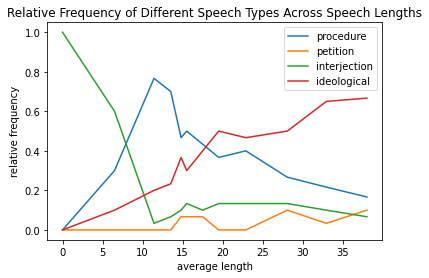

In [34]:
# line plot
lineDF = df.from_dict(speechType)

lineDF = lineDF.set_index('average length')
print(lineDF)
lineDF = lineDF.sort_index()

lineDF.plot.line(y=['procedure','petition','interjection','ideological'])
plt.ylabel('relative frequency')
plt.title('Relative Frequency of Different Speech Types Across Speech Lengths')
lineDF

    procedure   petition  interjection  ideological
0   44.000000   0.000000    264.000000    22.000000
1  218.800000   0.000000    200.566667   127.633333
2  585.333333  29.266667    117.066667   146.333333
3  262.600000   0.000000    101.000000   242.400000
4  361.833333   0.000000     27.833333   445.333333
5  339.300000  52.200000      0.000000   391.500000
6  184.166667  28.333333     85.000000   552.500000
7  155.666667  93.400000     62.266667   622.666667


Text(0.5, 1.0, 'Distribution of Speech Types Over Multiple Speech Lengths')

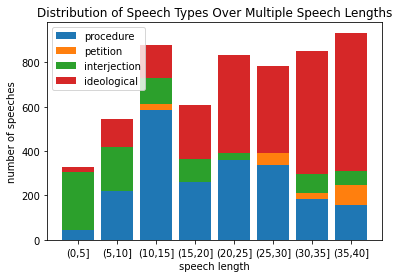

In [35]:
# plot histogram
histDF = df.from_dict(speechHist)

for type in histDF.columns:
    histDF.loc[:,type] = (histDF.loc[:,type]).multiply(frequency)

print(histDF)

labels = ['(0,5]','(5,10]','(10,15]','(15,20]','(20,25]','(25,30]','(30,35]','(35,40]']

plt.bar(labels, histDF.loc[:,'procedure'])
plt.bar(labels, histDF.loc[:,'petition'], bottom=histDF.loc[:,'procedure'])
plt.bar(labels, histDF.loc[:,'interjection'], bottom=(histDF.loc[:,'petition']).add(histDF.loc[:,'procedure']))
plt.bar(labels, histDF.loc[:,'ideological'], bottom=(histDF.loc[:,'petition']).add(histDF.loc[:,'procedure'].add(histDF.loc[:,'interjection'])))
plt.legend(['procedure', 'petition', 'interjection', 'ideological'])
plt.ylabel('number of speeches')
plt.xlabel('speech length')
plt.title('Distribution of Speech Types Over Multiple Speech Lengths')